#### 4-1. Selenium 사용하기

In [1]:
from selenium import webdriver

In [4]:
driver=webdriver.Chrome('.../chromedriver_win32/chromedriver')
driver.get("http://naver.com")

'chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다.'라는 크롬 창이 뜨게 됨.  
이때 뜨는 창은 가급적 손으로 조작하지 않는 것이 좋음.

In [6]:
elem_login=driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("hhs9173")

elem_login=driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("rmfkcnpzi6349!")

교재와 달리 로그인 창이 변경되었으므로 로그인 누르고 실행할것.

In [7]:
xpath="""//*[@id="frmNIDLogin"]/fieldset/input"""
driver.find_element_by_xpath(xpath).click()

In [8]:
driver.get("http://mail.naver.com")

In [13]:
from bs4 import BeautifulSoup

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [14]:
raw_list=soup.find_all('div','name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|10813) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|10812) _stopDefault" href="#" title='"이벤트메일" &lt;nbadmin@bizn.co.kr&gt;'>이벤트메일</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|10811) _stopDefault" href="#" title='"omni noreply" &lt;omni_noreply@bkr.co.kr&gt;'>omni noreply</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|10810) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|10808) _stopD

In [15]:
send_list=[raw_list[n].find('a').get_text() for n in range(0,len(raw_list))]
send_list

['네이버',
 '이벤트메일',
 'omni noreply',
 '네이버',
 '이벤트메일',
 '이벤트메일',
 '네이버',
 '주택관리사',
 '이벤트메일',
 '네이버',
 '네이버',
 '네이버',
 '창업신문',
 '이벤트메일',
 '갤러리아몰']

In [16]:
driver.close()

#### 4-2. 서울시 구별 주유소 가격 정보 얻기

In [17]:
driver=webdriver.Chrome(('.../chromedriver_win32/chromedriver'))
driver.get("http://www.opinet.co.kr/")

In [18]:
gu_list_raw=driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list=gu_list_raw.find_elements_by_tag_name("option")

In [19]:
gu_names=[option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [20]:
element=driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [21]:
xpath="""//*[@id="searRgSelect"]"""
element_sel_gu=driver.find_element_by_xpath(xpath).click()

In [22]:
xpath="""//*[@id="glopopd_excel"]/span"""
element_get_excel=driver.find_element_by_xpath(xpath).click()

In [24]:
import time

for gu in gu_names:
    element=driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath="""//*[@id="searRgSelect"]"""
    element_sel_gu=driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath="""//*[@id="glopopd_excel"]/span"""
    element_get_excel=driver.find_element_by_xpath(xpath).click()
    
    time.sleep(2)

#### 4-3. 구별 주유 가격에 대한 데이터의 정리

In [25]:
import pandas as pd
from glob import glob

In [ ]:
glob('.../지역*.xls')

In [ ]:
stations_files=glob('.../지역*.xls')
stations_files

In [28]:
tmp_raw=[]

for file_name in stations_files:
    tmp=pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw=pd.concat(tmp_raw)

In [29]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 40
Data columns (total 10 columns):
지역       501 non-null object
상호       501 non-null object
주소       501 non-null object
상표       501 non-null object
전화번호     501 non-null object
셀프여부     501 non-null object
고급휘발유    501 non-null object
휘발유      501 non-null object
경유       501 non-null object
실내등유     501 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


In [30]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1575,1427,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1788,1588,1473,1100
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1596,1409,-
3,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1596,1457,1200
4,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1596,1476,1147


In [31]:
stations=pd.DataFrame({'oil_store':station_raw['상호'],
                      '주소':station_raw['주소'],
                      '가격':station_raw['휘발유'],
                      '셀프':station_raw['셀프여부'],
                      '상표':station_raw['상표']})
stations.head()

,oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1588,N,GS칼텍스
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1596,Y,GS칼텍스
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지


In [32]:
stations['구']=[eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1588,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1596,Y,GS칼텍스,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구


In [33]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [34]:
stations[stations['가격']=='-']

,oil_store,주소,가격,셀프,상표,구
10,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
11,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
23,장위주유소,서울 성북구 화랑로 110 (하월곡동),-,N,SK에너지,성북구
17,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
33,(주)한진 김포공항주유소,서울 강서구 하늘길 259,-,Y,S-OIL,강서구
21,(주)새서울석유 대원셀프주유소,서울 구로구 개봉로 7,-,Y,SK에너지,구로구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [35]:
stations=stations[stations['가격']!='-']
stations.head()

,oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1588,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1596,Y,GS칼텍스,강동구
3,천호현대주유소,서울 강동구 천중로 67 (천호동),1596,N,현대오일뱅크,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구


In [36]:
stations['가격']=[float(value) for value in stations['가격']]

In [37]:
stations.reset_index(inplace=True)
del stations['index']

In [38]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 6 columns):
oil_store    493 non-null object
주소           493 non-null object
가격           493 non-null float64
셀프           493 non-null object
상표           493 non-null object
구            493 non-null object
dtypes: float64(1), object(5)
memory usage: 23.2+ KB


#### 4-4. 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('unknown')

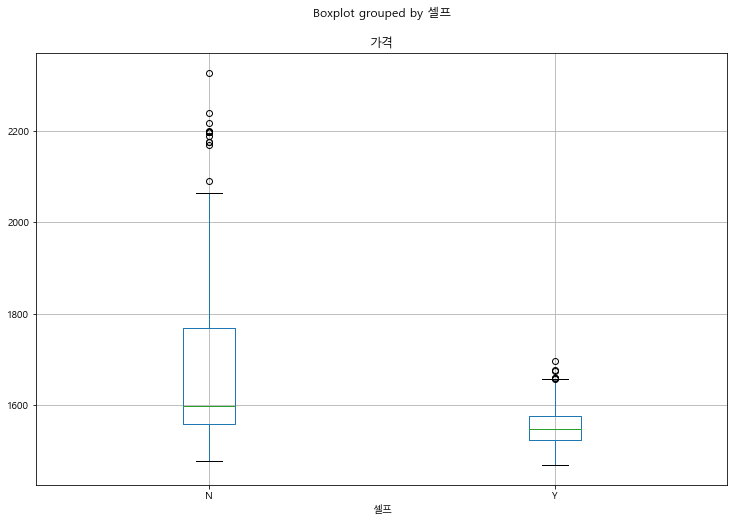

In [42]:
stations.boxplot(column='가격',by='셀프',figsize=(12,8));

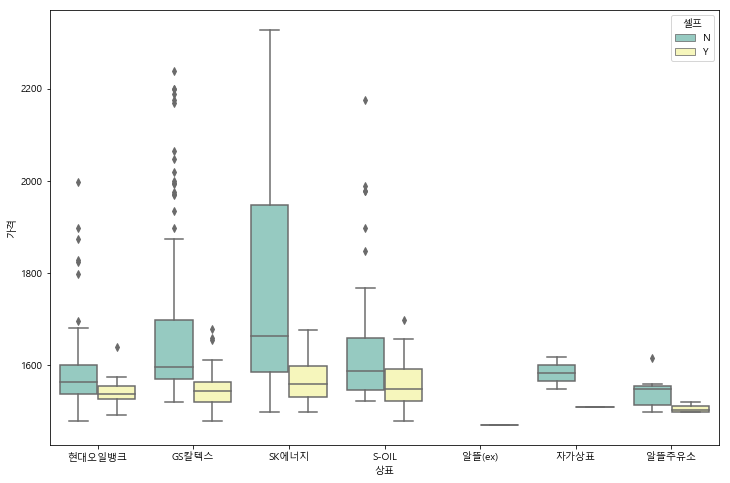

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="가격",hue="셀프",data=stations,palette="Set3")
plt.show()

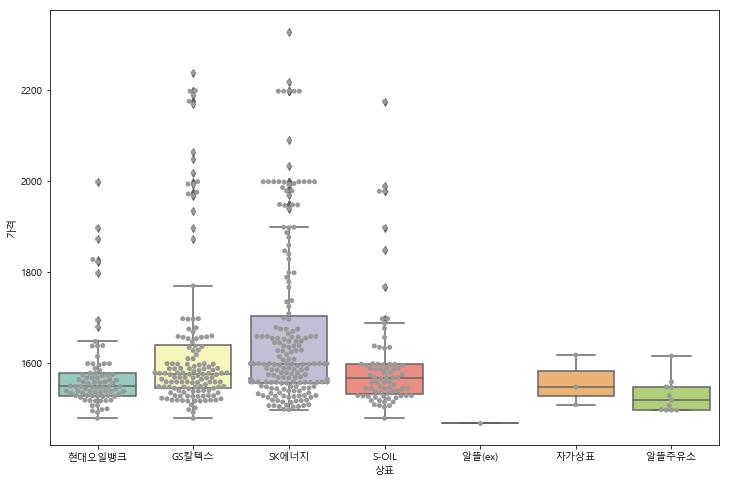

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="가격",data=stations,palette="Set3")
sns.swarmplot(x="상표",y="가격",data=stations,color=".6")
plt.show()

#### 4-5. 서울시 구별 주유 가격 확인하기

In [45]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [46]:
stations.sort_values(by='가격',ascending=False).head(10)

,oil_store,주소,가격,셀프,상표,구
304,서남주유소,서울 중구 통일로 30,2327.0,N,SK에너지,중구
303,SC(주) 역전주유소,서울 중구 퇴계로 15,2238.0,N,GS칼텍스,중구
492,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
302,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구
267,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
292,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
293,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구
300,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
301,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
266,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [47]:
stations.sort_values(by='가격',ascending=True).head(10)

,oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1469.0,Y,알뜰(ex),서초구
242,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1479.0,N,현대오일뱅크,강북구
241,수유동주유소,서울 강북구 도봉로 395 (수유동),1479.0,Y,GS칼텍스,강북구
240,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1479.0,Y,S-OIL,강북구
126,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구
127,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구
436,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1495.0,N,현대오일뱅크,도봉구
321,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1497.0,N,알뜰주유소,강서구
322,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구
128,원천주유소,서울 성북구 돌곶이로 142 (장위동),1497.0,N,알뜰주유소,성북구


In [48]:
import numpy as np
gu_data=pd.pivot_table(stations,index=["구"],values=["가격"],aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1772.384615
강동구,1637.625000
강북구,1513.769231
강서구,1565.151515
관악구,1595.187500


In [53]:
geo_path='../02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

map=folium.Map(location=[37.5502,126.982], zoom_start=10.5,
              titles='Stamen Toner')

folium.Choropleth(geo_data=geo_str,data=gu_data,columns=[gu_data.index,'가격'],
              fill_color='PuRd',key_on='feature.id').add_to(map)
map

#### 4-6. 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [54]:
oil_price_top10=stations.sort_values(by='가격',ascending=False).head(10)
oil_price_top10

,oil_store,주소,가격,셀프,상표,구
304,서남주유소,서울 중구 통일로 30,2327.0,N,SK에너지,중구
303,SC(주) 역전주유소,서울 중구 퇴계로 15,2238.0,N,GS칼텍스,중구
492,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
302,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구
267,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
292,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
293,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구
300,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
301,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
266,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [55]:
oil_price_bottom10=stations.sort_values(by='가격',ascending=True).head(10)
oil_price_bottom10

,oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1469.0,Y,알뜰(ex),서초구
242,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1479.0,N,현대오일뱅크,강북구
241,수유동주유소,서울 강북구 도봉로 395 (수유동),1479.0,Y,GS칼텍스,강북구
240,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1479.0,Y,S-OIL,강북구
126,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구
127,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구
436,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1495.0,N,현대오일뱅크,도봉구
321,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1497.0,N,알뜰주유소,강서구
322,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구
128,원천주유소,서울 성북구 돌곶이로 142 (장위동),1497.0,N,알뜰주유소,성북구


In [56]:
gmap_key="***********"
gmaps=googlemaps.Client(key=gmap_key)

In [60]:
lat=[]
lng=[]

for n in oil_price_top10.index:
    try:
        tmp_add=str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map=gmaps.geocode(tmp_add)
        
        tmp_loc=tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
            
oil_price_top10['lat']=lat
oil_price_top10['lng']=lng
oil_price_top10

Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !


,oil_store,주소,가격,셀프,상표,구,lat,lng
304,서남주유소,서울 중구 통일로 30,2327.0,N,SK에너지,중구,NaN,NaN
303,SC(주) 역전주유소,서울 중구 퇴계로 15,2238.0,N,GS칼텍스,중구,NaN,NaN
492,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구,NaN,NaN
302,필동주유소,서울 중구 퇴계로 196 (필동2가),2199.0,N,GS칼텍스,중구,NaN,NaN
267,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구,NaN,NaN
292,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구,NaN,NaN
293,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구,NaN,NaN
300,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구,NaN,NaN
301,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구,NaN,NaN
266,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구,NaN,NaN


In [61]:
lat=[]
lng=[]

for n in oil_price_bottom10.index:
    try:
        tmp_add=str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map=gmaps.geocode(tmp_add)
        
        tmp_loc=tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
            
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !


,oil_store,주소,가격,셀프,상표,구,lat,lng
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1469.0,Y,알뜰(ex),서초구,NaN,NaN
242,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1479.0,N,현대오일뱅크,강북구,NaN,NaN
241,수유동주유소,서울 강북구 도봉로 395 (수유동),1479.0,Y,GS칼텍스,강북구,NaN,NaN
240,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1479.0,Y,S-OIL,강북구,NaN,NaN
126,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구,NaN,NaN
127,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구,NaN,NaN
436,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1495.0,N,현대오일뱅크,도봉구,NaN,NaN
321,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1497.0,N,알뜰주유소,강서구,NaN,NaN
322,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구,NaN,NaN
128,원천주유소,서울 성북구 돌곶이로 142 (장위동),1497.0,N,알뜰주유소,성북구,NaN,NaN


In [62]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map